In [2]:
import pandas as pd
import numpy as np
from os import walk
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
tic = time.time()
#Read airline data file for year 2003
df_flight = pd.read_csv("2003.csv")
toc = time.time()
print(toc-tic)

C:\Users\itiag\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


34.859041690826416


In [4]:
# Filter out unimportant columns

df_flight = df_flight[['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'UniqueCarrier',
 'ArrTime',                     
 'CRSArrTime',                     
 'CRSDepTime',
 'ArrDelay',
 'DepDelay',                      
 'Origin',
 'Dest' ,                    
 'Distance',
 'Cancelled' ]]

df_flight.head(5)

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,ArrTime,CRSArrTime,CRSDepTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled
0,2003,1,29,3,UA,1912.0,1913,1655,-1.0,-4.0,ORD,MSY,837,0
1,2003,1,30,4,UA,1910.0,1913,1655,-3.0,-1.0,ORD,MSY,837,0
2,2003,1,31,5,UA,1936.0,1913,1655,23.0,29.0,ORD,MSY,837,0
3,2003,1,1,3,UA,1625.0,1634,1035,-9.0,-2.0,OAK,ORD,1835,0
4,2003,1,2,4,UA,1726.0,1634,1035,52.0,18.0,OAK,ORD,1835,0


In [7]:
# Assign data to df_cancelled if flight is cancelled
df_cancelled=df_flight[df_flight['Cancelled']==1]
df_cancelled.shape

(101469, 14)

In [9]:
df_cancelled.head(5)

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,ArrTime,CRSArrTime,CRSDepTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled
52,2003,1,13,1,UA,NaN,1539,1400,NaN,NaN,BOS,IAD,413,1
164,2003,1,7,2,UA,NaN,1610,1445,NaN,NaN,ORD,MSP,334,1
246,2003,1,23,4,UA,NaN,911,725,NaN,NaN,TPA,ORD,1012,1
556,2003,1,27,1,UA,NaN,1725,1625,NaN,NaN,PHX,SFO,651,1
1295,2003,1,22,3,UA,NaN,1437,1254,NaN,NaN,BOI,DEN,649,1


In [6]:
tic = time.time()
# Write data to CSV for future use
df_cancelled.to_csv('cancelled_airline_2003_data.csv',index=False)
toc = time.time()
print(toc-tic)

3.1993799209594727


In [8]:
# How much of your data is missing?
df_flight.isnull().sum().sort_values(ascending=False).head()

ArrDelay     112851
ArrTime      112850
DepDelay     101469
Cancelled         0
Distance          0
dtype: int64

In [10]:
#Cancelled flights has null data in ArrDelay, ArrTime, DepDelay, 
#thus we are keeping only on cancelled flight for delay analysis
# Assign data to df_cancelled if flight is non cancelled
df_delay=df_flight[df_flight['Cancelled']==0]
df_delay.shape


(6387071, 14)

In [17]:
#Drop rows with missing data in the important columns, i.e. the predictors for flight delay
total_data_rows = len(df_delay.index)
#Drop NaNs
df_delay.dropna(subset = ['ArrDelay','ArrTime'],inplace=True)
data_retained = len(df_delay.index)/total_data_rows
print('Data Retained: '+str(round(data_retained*100,2))+' %')

Data Retained: 99.82 %


C:\Users\itiag\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [18]:
# How much of your data is missing?
df_delay.isnull().sum().sort_values(ascending=False).head()

Cancelled    0
Distance     0
Dest         0
Origin       0
DepDelay     0
dtype: int64

In [20]:
#Get the Departure and Arrival Hours
#For DEP_HOUR, take the CRS_DEP_TIME
df_delay['DEP_HOUR'] = df_delay['CRSDepTime'].apply(lambda x:int(str(x)[:2]) if x>999 else int(str(x)[:1] if x>99 else 0))
#For ARR_HOUR, take the actual arrival time
df_delay['ARR_HOUR'] = df_delay['ArrTime'].apply(lambda x:int(str(x)[:2]) if x>999 else int(str(x)[:1] if x>99 else 0))
df_delay['ARR_HOUR'] = df_delay['ARR_HOUR'].apply(lambda x:0 if x==24 else x)

C:\Users\itiag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\itiag\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\itiag\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [12]:
#Initial Data Exploration

#Total number of flights in our dataset:
len(df_delay.index)

6488540

In [21]:
#Average number of flights per day in 2003:
len(df_delay.index)/365

17467.641095890413

In [22]:
#Percent of flights with delays greater than 15 minutes:
len(df_delay[df_delay['ArrDelay']>15].index)/len(df_delay.index)

0.15772899211363667

#Arrival Delay Visualizations
#Visualize the ArrDelay for top 10 airlines

#Get the list of the 10 biggest Airline Carriers
top10_carrier = list(df_flight['UniqueCarrier'].value_counts().head(10).index)
df_sub = df_flight[df_flight['UniqueCarrier'].isin(top10_carrier)][['UniqueCarrier','Origin','Dest','ArrDelay']]

In [24]:
#Visualize the ArrDelay for top 10 airlines
#Get the list of the 10 biggest Airline Carriers 
top10_carrier = list(df_delay['UniqueCarrier'].value_counts().head(10).index) 
df_sub = df_delay[df_delay['UniqueCarrier'].isin(top10_carrier)][['UniqueCarrier','Origin','Dest','ArrDelay']]

In [25]:
#Read the Carrier Key CSV file for full names of the Airlines
carrier_key = pd.read_csv('carriers.csv')

#Merge with the dataframe containing the 10 biggest Airline Carriers
df_sub = pd.merge(df_sub,carrier_key,how='left',left_on='UniqueCarrier', right_on='Code')

In [27]:
#Create a copy of the dataframe for Violin plot. Delays greater than 30 minutes are clubbed to show the data at the same scale
df_temp = df_sub.copy()
#All delays greater than 30 minutes are clubbed at 30
df_temp['ArrDelay'] = df_temp['ArrDelay'].apply(lambda x:30 if x>=30 else x)
df_temp['ArrDelay'] = df_temp['ArrDelay'].apply(lambda x:-30 if x<=-30 else x)

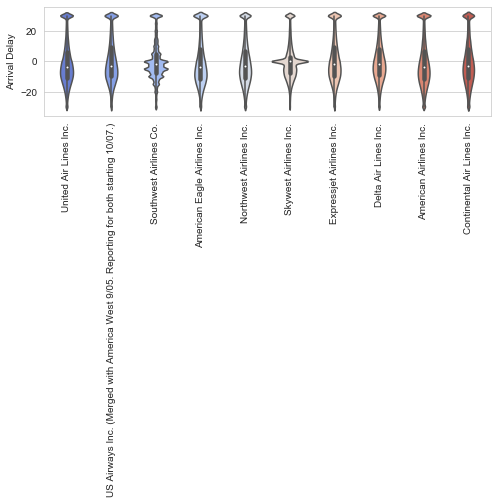

In [29]:
#Create the plot in seaborn
plt.figure(figsize=(8, 2))
g = sns.violinplot(x="Description", y="ArrDelay", data=df_temp,palette="coolwarm")
g.set_ylabel('Arrival Delay')
g.set_xlabel('')
label = g.set_xticklabels(g.get_xticklabels(), rotation=90)
fig = g.get_figure()
fig.savefig("delay_violin_plot.png", bbox_inches='tight')

In [31]:
#Plot percentage of flights delayed more than 30 minutes

carrier_delay = pd.DataFrame()

for UC in list(df_delay['UniqueCarrier'].unique()):
    perc_delayed = len(df_delay[(df_delay['UniqueCarrier']==UC) & (df_delay['ArrDelay']>=30)].index)/len(df_delay[df_delay['UniqueCarrier']==UC].index)*100
    carrier_delay = carrier_delay.append({'UniqueCarrier':UC,'percent_delayed' : perc_delayed},ignore_index=True)

carrier_delay = pd.merge(carrier_delay,carrier_key,how='left',left_on='UniqueCarrier', right_on='Code')
carrier_delay.drop(['UniqueCarrier','Code'],axis=1,inplace=True)
carrier_delay.rename(index=str,columns={'Description':'Airline'},inplace=True)
#Sort by percentage delayed
carrier_delay.sort_values(by = ['percent_delayed'],ascending=False,inplace=True)

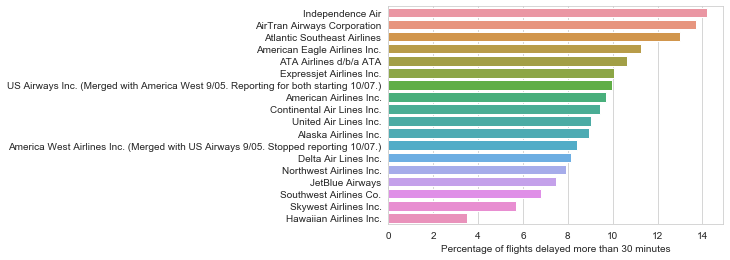

In [33]:
color_pal = sns.color_palette("OrRd", len(carrier_delay.index))
color_pal = color_pal[::-1]

plt.figure(figsize=(6, 4))
g = sns.barplot(x="percent_delayed", y="Airline", data=carrier_delay)
g.set_ylabel('')
g.set_xlabel('Percentage of flights delayed more than 30 minutes')
fig = g.get_figure()
fig.savefig("carrier_delay.png", bbox_inches='tight')

In [34]:
carrier_delay

,percent_delayed,Airline
16,14.215207,Independence Air
10,13.709152,AirTran Airways Corporation
9,12.980957,Atlantic Southeast Airlines
3,11.259285,American Eagle Airlines Inc.
7,10.651139,ATA Airlines d/b/a ATA
6,10.059234,Expressjet Airlines Inc.
1,9.977086,US Airways Inc. (Merged with America West 9/05...
12,9.709749,American Airlines Inc.
15,9.428267,Continental Air Lines Inc.
0,9.039276,United Air Lines Inc.
